In [155]:
import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
from eofs.xarray import Eof

import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')
from plotting.maps import CartopyMap

In [3]:
ds_tors = xr.open_dataset('./tordays.nc')
ds_nontors = xr.open_dataset('./nontordays.nc')

In [6]:
ds_all = xr.concat([ds_tors, ds_nontors], dim='time')

In [7]:
ds_all

<xarray.Dataset>
Dimensions:  (lat: 12, lon: 25, time: 544)
Coordinates:
    level    float32 500.0
  * lon      (lon) float32 -127.5 -125.0 -122.5 -120.0 ... -72.5 -70.0 -67.5
  * lat      (lat) float32 50.0 47.5 45.0 42.5 40.0 ... 32.5 30.0 27.5 25.0 22.5
  * time     (time) datetime64[ns] 1985-05-21 1985-05-28 ... 2018-06-01
Data variables:
    hgt      (time, lat, lon) float32 127.5332 126.7334 ... 16.1333 5.533203

In [13]:
coslat = np.cos(np.deg2rad(ds_all.coords['lat'].values)).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(ds_all.hgt, weights=wgts)

In [74]:
# n = 3
eofs = solver.eofsAsCorrelation()
pcs = solver.pcs()

In [110]:
firstfivepcs = pcs.sel(mode=slice(0, 4)).to_dataframe()

In [152]:
tor_days = ds_tors.time.to_dataframe()
nontor_days = ds_nontors.time.to_dataframe()

In [156]:
tor_days['tor'] = 1
nontor_days['tor'] = 0
alldays = pd.concat([tor_days, nontor_days])

In [172]:
tor_pc_data = firstfivepcs.join(alldays, on='time')[['pcs', 'tor']].reset_index()

In [178]:
# tor_pc_data.to_csv('./tor_pcs.csv', index=False)

In [68]:
firstpc = pcs.sel(mode=0)
secondpc = pcs.sel(mode=1)
thirdpc = pcs.sel(mode=2)

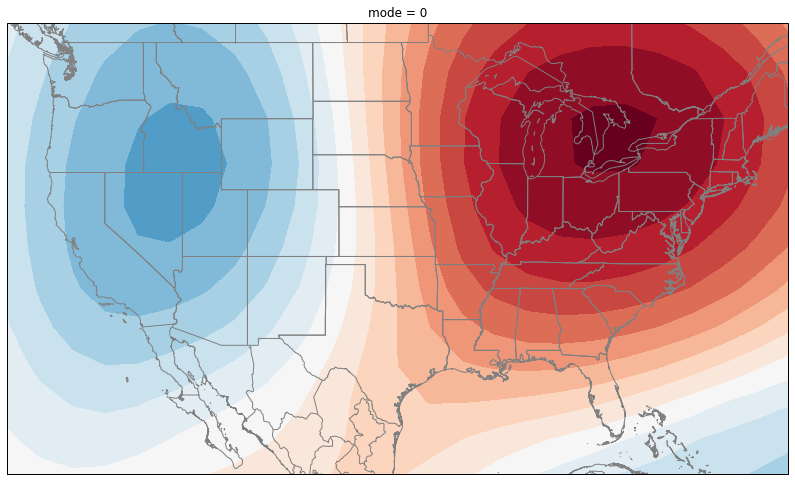

In [91]:
fig = plt.figure(figsize=(14, 14))
clevs = np.linspace(-1, 1, 20)

proj = ccrs.Mercator()
bgmap = CartopyMap(proj)
bgmap.draw()
eofs[0].plot.contourf(ax=bgmap.ax, cmap=plt.cm.RdBu_r, levels=clevs,
                         transform=ccrs.PlateCarree(), add_colorbar=False)

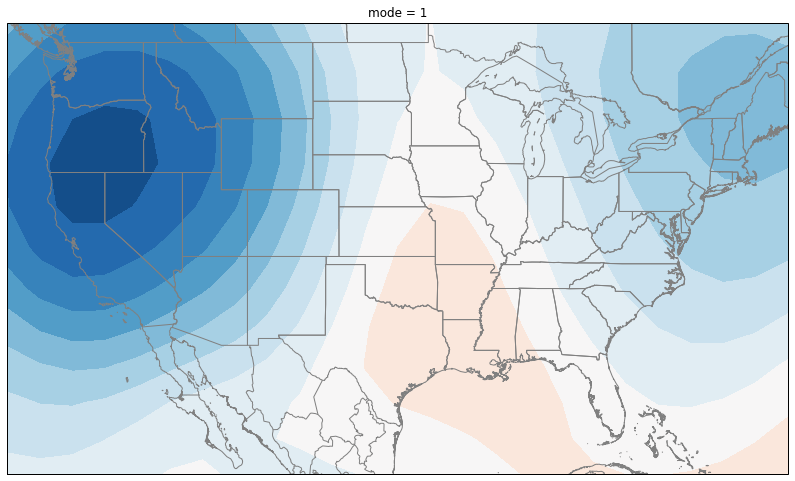

In [92]:
fig = plt.figure(figsize=(14, 14))

proj = ccrs.Mercator()
bgmap = CartopyMap(proj)
bgmap.draw()
eofs[1].plot.contourf(ax=bgmap.ax, cmap=plt.cm.RdBu_r, levels=clevs,
                         transform=ccrs.PlateCarree(), add_colorbar=False)

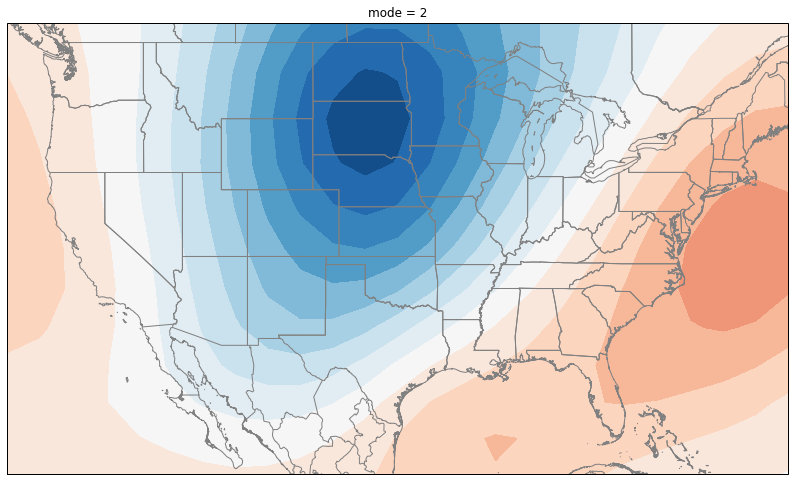

In [93]:
fig = plt.figure(figsize=(14, 14))

proj = ccrs.Mercator()
bgmap = CartopyMap(proj)
bgmap.draw()
eofs[2].plot.contourf(ax=bgmap.ax, cmap=plt.cm.RdBu_r, levels=clevs,
                         transform=ccrs.PlateCarree(), add_colorbar=False)

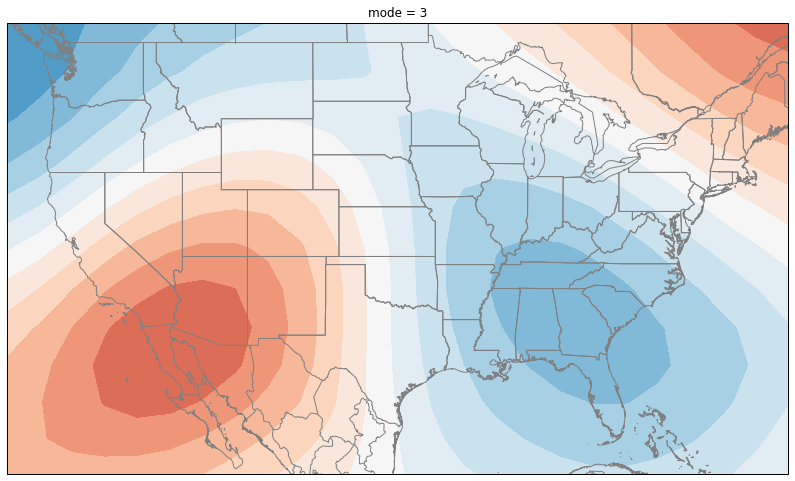

In [94]:
fig = plt.figure(figsize=(14, 14))

proj = ccrs.Mercator()
bgmap = CartopyMap(proj)
bgmap.draw()
eofs[3].plot.contourf(ax=bgmap.ax, cmap=plt.cm.RdBu_r, levels=clevs,
                         transform=ccrs.PlateCarree(), add_colorbar=False)

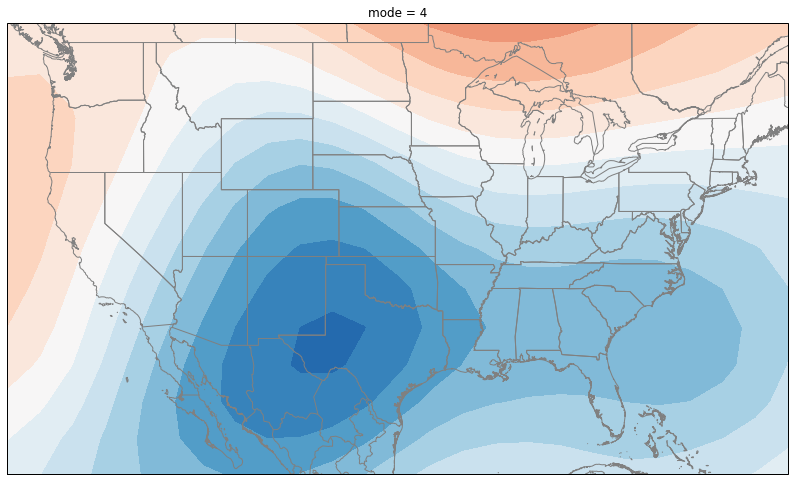

In [114]:
fig = plt.figure(figsize=(14, 14))

proj = ccrs.Mercator()
bgmap = CartopyMap(proj)
bgmap.draw()
eofs[4].plot.contourf(ax=bgmap.ax, cmap=plt.cm.RdBu_r, levels=clevs,
                         transform=ccrs.PlateCarree(), add_colorbar=False)